# A. Basics of Linear Algebra to Solve Systems of Equations

**Goals**
- Understand how to represent a linear system in matrix form $A\mathbf{x}=\mathbf{b}$.
- Diagnose when a system has a unique solution, infinitely many solutions, or no solution.
- Use NumPy to compute ranks, determinants, and solve or analyze systems.
- See geometric intuition in 2D (lines) and learn core algorithms (Gaussian elimination).

In [8]:
# Add this to your cells to import commonly used libraries
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

### 1. Linear systems and matrix form
A linear system with unknown vector $\mathbf{x} \in \mathbb{R}^n$ can be written as $A\mathbf{x} = \mathbf{b},$ where $A \in \mathbb{R}^{m\times n}$ is the coefficient matrix and $\mathbf{b} \in \mathbb{R}^m$.

**Augmented matrix**: $[A\mid \mathbf{b}]$ is useful for row-reduction (Gaussian elimination).

In this example below, we have two equations: 
x + y + z = 3 & 2x -y -3z = 0

In [9]:
# Add comments yourself!!!
# A small example system
import numpy as np
A = np.array([[1., 1., 1.], [2., -1., -3]])
b = np.array([3., 0.])#[:, None]
print('A =\n', A)
print('b =\n', b)
aug = np.c_[A, b]  # Syntax to create augmented matrix [A|b]
print('Augmented [A|b] =\n', aug)

A =
 [[ 1.  1.  1.]
 [ 2. -1. -3.]]
b =
 [3. 0.]
Augmented [A|b] =
 [[ 1.  1.  1.  3.]
 [ 2. -1. -3.  0.]]


### 2. Types of solutions and rank conditions
Let $r = \operatorname{rank}(A)$ and $r_a = \operatorname{rank}([A\mid \mathbf{b}])$.
- **Unique solution**: $r = r_a = n$.
- **Infinitely many solutions**: $r = r_a < n$.
- **No solution** (inconsistent): $r \neq r_a$.

For a square system ($m=n$): $\det(A) \neq 0$ $\Rightarrow$ unique solution; if $\det(A)=0$, then either infinitely many or none (check consistency).

#### 2.1 Unique solution example
We have two equations in the example below: x + y = 3 & 2x - y = 0. That's why we have a unique solution.

In [10]:
A1 = np.array([[1., 1.], [2., -1.]])
b1 = np.array([3., 0.])
rA1 = matrix_rank(A1)
rAug1 = matrix_rank(np.c_[A1, b1])
print('rank(A)=', rA1, ' rank([A|b])=', rAug1)
print('det(A)=', det(A1))

rank(A)= 2  rank([A|b])= 2
det(A)= -2.9999999999999996


Exercise- 
Plot these two functions in the same plot

rank(A)= 2  rank([A|b])= 2
det(A)= -2.9999999999999996


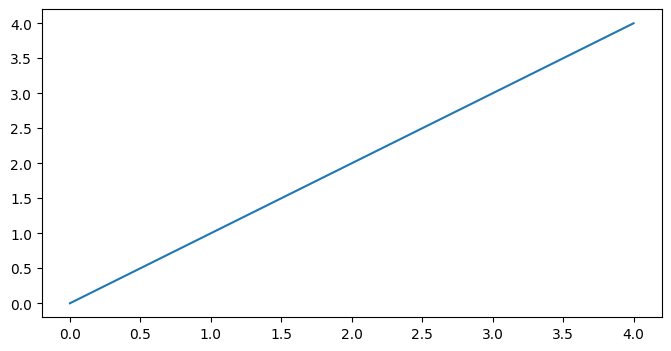

In [26]:
A1 = np.array([[1., 1.], [2., -1.]])
b1 = np.array([3., 0.])
rA1 = matrix_rank(A1)
rAug1 = matrix_rank(np.c_[A1, b1])
print('rank(A)=', rA1, ' rank([A|b])=', rAug1)
print('det(A)=', det(A1))
xs = np.linspace(0, 4, 400)
ys = (xs)
plt.figure(figsize = (8, 4))
plt.plot(xs, ys, label = 'f(x) = x + y = 4 and 2x - y = 0')


#### 2.2 Infinitely many solutions example
In this example, the second equation is a multiple of the first.

In [ ]:
import numpy as np
A2 = np.array([[1., 1.], [2., 2.]])
b2 = np.array([2., 4.])
rA2 = np.linalg.matrix_rank(A2)
rAug2 = np.linalg.matrix_rank(np.c_[A2, b2])
print('rank(A)=', rA2, ' rank([A|b])=', rAug2)
print('det(A)=', np.linalg.det(A2))

rank(A)= 1  rank([A|b])= 1
det(A)= 0.0


Exercise- 

Plot there two functions together in one plot: x + y = 2 & 2x + 2y = 4

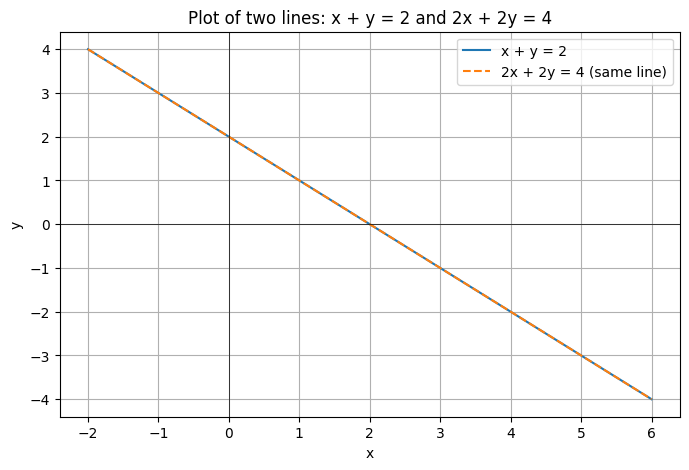

In [28]:
xs = np.linspace(-2, 6, 400)
y1 = 2 - xs             
y2 = (4 - 2*xs) / 2      

plt.figure(figsize=(8, 5))
plt.plot(xs, y1, label='x + y = 2')
plt.plot(xs, y2, '--', label='2x + 2y = 4 (same line)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of two lines: x + y = 2 and 2x + 2y = 4')
plt.grid(True)
plt.legend()
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.show()

#### 2.3 No solution example
Parallel lines (inconsistent).

In [6]:
A3 = np.array([[1., 1.], [2., 2.]])
b3 = np.array([2., 5.])
rA3 = np.linalg.matrix_rank(A3)
rAug3 = np.linalg.matrix_rank(np.c_[A3, b3])
print('rank(A)=', rA3, ' rank([A|b])=', rAug3, ' => inconsistent')
print('det(A)=', np.linalg.det(A3))


rank(A)= 1  rank([A|b])= 2  => inconsistent
det(A)= 0.0


Exercise-

Plot these two functions toghether in one plot: x + y = 2 & 2x + 2y = 5

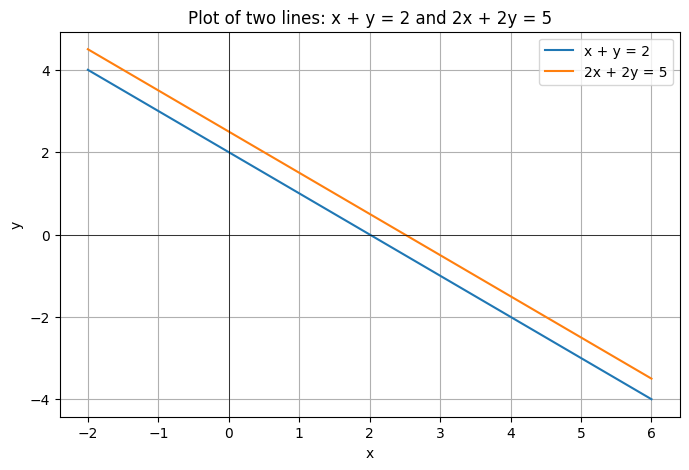

In [11]:
import matplotlib.pyplot as plt

xs = np.linspace(-2, 6, 400)
y1 = 2 - xs                  # from x + y = 2
y2 = (5 - 2*xs) / 2          # from 2x + 2y = 5 -> y = (5 - 2x)/2

plt.figure(figsize=(8,5))
plt.plot(xs, y1, label='x + y = 2')
plt.plot(xs, y2, label='2x + 2y = 5')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of two lines: x + y = 2 and 2x + 2y = 5')
plt.grid(True)
plt.legend()
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.show()


# B. Solving Systems of Linear Equations with Python
We will explore various methods for solving systems of linear equations using Python. We will cover

1. Solving systems using `numpy.linalg.solve` and matrix inversion
2. Gauss Elimination
3. Iterative methods like Gauss-Seidel
4. Least squares method

## 1. Types of Solutions to Linear Systems
- Unique solution
- Infinite solutions
- No solution
- Geometric interpretation
- Role of rank and determinant

### Geometric interpretation in 2D
- Unique solution: two lines intersect at one point.
- Infinite solutions: coincident lines.
- No solution: parallel, distinct lines.

## 2. Direct Methods
### a. Using `np.linalg.solve`
When 1.)The coefficient matrix A is square (same number of equations as unknowns). 2.) The matrix A is full rank (i.e., its determinant is non-zero).

Don't use when 1.) The matrix is not square. 2.)The matrix is singular (determinant is zero). 3.)The system has no solution or infinitely many solutions.

In [13]:
import numpy as np
A = np.array([[2, 1], [1, 3]])
b = np.array([8, 13])
print("A=", A)
print("b=", b)
print("Augmented Matrix [A|b] =\n", np.c_[A, b])
print('rank(A)=', np.linalg.matrix_rank(A), ' rank([A|b])=', np.linalg.matrix_rank(np.c_[A, b]))
print('det(A)=', np.linalg.det(A))
x = np.linalg.solve(A, b)
print("Solution:\n", x)

A= [[2 1]
 [1 3]]
b= [ 8 13]
Augmented Matrix [A|b] =
 [[ 2  1  8]
 [ 1  3 13]]
rank(A)= 2  rank([A|b])= 2
det(A)= 5.000000000000001
Solution:
 [2.2 3.6]


### b. Matrix Inversion
Determinant and invertibility (square systems)
If $\det(A) \neq 0$, then $A$ is invertible and the unique solution is $\mathbf{x}=A^{-1}\mathbf{b}$. If $\det(A)=0$, the system is either inconsistent or has infinitely many solutions.

In [ ]:
import numpy as np
A = np.array([[2, 1], [1, 3]])
b = np.array([8, 13])

print('det(A)=', np.linalg.det(A))

x = np.linalg.inv(A) @ b
print("Solution via inversion:", x)

det(A)= 5.000000000000001
Solution via inversion: [2.2 3.6]


## 3. Gaussian Elimination
Manual row operations to echelon form and back-substitution.
Below is a simple implementation with partial pivoting to reach (upper) row-echelon form and solve when a unique solution exists.

### Example-
Let's solve this system of equation:

2x + y - z = 8 

-3x - y + 2z = -11

-2x + y + 2z = -3


In [ ]:

import numpy as np

# (Re)define A and b for clarity in this cell (matches notebook variables)
A = np.array([[2., 1., -1.],
              [3., 3.,  9.],
              [3., 4.,  2.]])
b = np.array([8., 0., -5.])

# Build augmented matrix
aug = np.hstack([A.astype(float), b.reshape(-1, 1).astype(float)])

print("Step 1: Initial augmented matrix [A | b]:")
print(aug)
print()

# Helper to swap rows if pivot is (near) zero
def ensure_nonzero_pivot(mat, pivot_row, pivot_col):
    n = mat.shape[0]
    if abs(mat[pivot_row, pivot_col]) < 1e-12:
        for r in range(pivot_row + 1, n):
            if abs(mat[r, pivot_col]) > 1e-12:
                mat[[pivot_row, r]] = mat[[r, pivot_row]]
                print(f"Swapped row {pivot_row} with row {r} to avoid zero pivot")
                print(mat)
                print()
                return
        # If we get here pivot is zero and cannot be fixed; leave as is.

# Step 2: Make pivot at (0,0) = 1 (scale row 0)
ensure_nonzero_pivot(aug, 0, 0)
pivot = aug[0, 0]
if abs(pivot) < 1e-12:
    raise ZeroDivisionError("Zero pivot encountered at (0,0).")
aug[0] = aug[0] / pivot
print("Step 2: Make pivot A[0,0] = 1 (scale row 0):")
print(aug)
print()

# Step 3: Eliminate A[1,0] using row 0
factor = aug[1, 0]
aug[1] = aug[1] - factor * aug[0]
print("Step 3: Eliminate A[1,0] using row 0:")
print(aug)
print()

# Step 4: Eliminate A[2,0] using row 0
factor = aug[2, 0]
aug[2] = aug[2] - factor * aug[0]
print("Step 4: Eliminate A[2,0] using row 0:")
print(aug)
print()

# Step 5: Make pivot A[1,1] = 1 (scale row 1), swap if needed
ensure_nonzero_pivot(aug, 1, 1)
pivot = aug[1, 1]
if abs(pivot) < 1e-12:
    raise ZeroDivisionError("Zero pivot encountered at (1,1).")
aug[1] = aug[1] / pivot
print("Step 5: Make pivot A[1,1] = 1 (scale row 1):")
print(aug)
print()

# Step 6: Eliminate A[2,1] using row 1
factor = aug[2, 1]
aug[2] = aug[2] - factor * aug[1]
print("Step 6: Eliminate A[2,1] using row 1:")
print(aug)
print()

# Step 7: Make pivot A[2,2] = 1 (scale row 2)
ensure_nonzero_pivot(aug, 2, 2)
pivot = aug[2, 2]
if abs(pivot) < 1e-12:
    raise ZeroDivisionError("Zero pivot encountered at (2,2).")
aug[2] = aug[2] / pivot
print("Step 7: Make pivot A[2,2] = 1 (scale row 2):")
print(aug)
print()

# Step 8: Back substitution to get final solution
U = aug[:, :-1]
y = aug[:, -1]

n = U.shape[0]
x = np.zeros(n)
for i in range(n - 1, -1, -1):
    s = U[i, i+1:] @ x[i+1:]
    x[i] = (y[i] - s) / U[i, i]

print("Step 8: Back substitution result (solution vector x):")
print(x)
print()

try:
    x_np = np.linalg.solve(A, b)
    print("Verification with np.linalg.solve:")
    print(x_np)
except Exception as e:
    print("np.linalg.solve could not compute solution:", e)

Step 1: Initial augmented matrix [A | b]:
[[ 2.  1. -1.  8.]
 [ 3.  3.  9.  0.]
 [ 3.  4.  2. -5.]]

Step 2: Make pivot A[0,0] = 1 (scale row 0):
[[ 1.   0.5 -0.5  4. ]
 [ 3.   3.   9.   0. ]
 [ 3.   4.   2.  -5. ]]

Step 3: Eliminate A[1,0] using row 0:
[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  3.    4.    2.   -5. ]]

Step 4: Eliminate A[2,0] using row 0:
[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  0.    2.5   3.5 -17. ]]

Step 5: Make pivot A[1,1] = 1 (scale row 1):
[[  1.    0.5  -0.5   4. ]
 [  0.    1.    7.   -8. ]
 [  0.    2.5   3.5 -17. ]]

Step 6: Eliminate A[2,1] using row 1:
[[  1.    0.5  -0.5   4. ]
 [  0.    1.    7.   -8. ]
 [  0.    0.  -14.    3. ]]

Step 7: Make pivot A[2,2] = 1 (scale row 2):
[[ 1.          0.5        -0.5         4.        ]
 [ 0.          1.          7.         -8.        ]
 [-0.         -0.          1.         -0.21428571]]

Step 8: Back substitution result (solution vector x):
[ 7.14285714 -6.5        -0.21428571]


Exercise-

Use loops to do the foward elimination (i.e., make pivot and eliminate) and the back substitution for Gaussian Elimination. Draw a flow chart first. 

In [16]:
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

A = np.array([[2., 1., -1.], [3., 2., 9.], [3., 4., 2.]])
b = np.array([8., 0., -5.])
# use the matrix_rank function imported from numpy.linalg
n = matrix_rank(np.c_[A, b])
print("The rank of the augmented matrix is:", matrix_rank(np.c_[A, b]))
print("The number of unknowns/equations is n =", n)




The rank of the augmented matrix is: 3
The number of unknowns/equations is n = 3


## 4. Iterative Method- Gauss-Seidel 

 This method solves a system of linear equations iteratively and prints the updated solution vector at each iteration until convergence.

Example-

Let's solve this system of equation:

4x_0 - x_1         = 15 

-x_0 - 4x_1 - x_2  = 10
     
     - x_1  + 3x_2 = 10


In [5]:
import numpy as np

# Define the system of equations
A = np.array([[4.0, -1.0, 0.0],
              [-1.0, 4.0, -1.0],
              [0.0, -1.0, 3.0]])
b = np.array([15.0, 10.0, 10.0])

# Initial guess
x = np.zeros_like(b)

# Tolerance and maximum iterations
tol = 1e-6
max_iterations = 25

n = len(b)
print ("length of b array=", n)

print("Initial guess:", x)

for k in range(max_iterations):
    x_new = np.copy(x)
    print(f"Iteration {k+1}:")
    for i in range(n):
        s1 = sum(A[i][j] * x_new[j] for j in range(i))
        s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x_new[i] = (b[i] - s1 - s2) / A[i][i]
        print(f"x[{i}] = {x_new[i]}")

    # Check for convergence
    if np.allclose(x, x_new, atol=tol):
        print("Converged!")
        break
    x = x_new

print("Final solution:")
print(x)


length of b array= 3
Initial guess: [0. 0. 0.]
Iteration 1:
x[0] = 3.75
x[1] = 3.4375
x[2] = 4.479166666666667
Iteration 2:
x[0] = 4.609375
x[1] = 4.772135416666667
x[2] = 4.924045138888889
Iteration 3:
x[0] = 4.943033854166667
x[1] = 4.966769748263889
x[2] = 4.988923249421297
Iteration 4:
x[0] = 4.991692437065972
x[1] = 4.995153921621817
x[2] = 4.998384640540606
Iteration 5:
x[0] = 4.998788480405454
x[1] = 4.9992932802365155
x[2] = 4.999764426745505
Iteration 6:
x[0] = 4.999823320059129
x[1] = 4.999896936701158
x[2] = 4.999965645567053
Iteration 7:
x[0] = 4.99997423417529
x[1] = 4.999984969935586
x[2] = 4.9999949899785285
Iteration 8:
x[0] = 4.999996242483896
x[1] = 4.999997808115606
x[2] = 4.999999269371869
Converged!
Final solution:
[5. 5. 5.]


Exercise- 
Draw the flowchart of the code above.

## 5 Least Squares Method 
(Optional for now. We will discuss more later.)


Using `np.linalg.lstsq` for least-squares solutions.
When 1.) The matrix is not square (more equations than unknowns). 2.)The matrix is singular (determinant is zero). 3.)The system has no solution or infinitely many solutions.

When a system of linear equations is **overdetermined** (more equations than unknowns), an exact solution may not exist. In such cases, we also use the **least squares method** to find an approximate solution that minimizes the residual error.

Notes
- `np.linalg.lstsq` returns the solution vector `x`, residuals, rank of matrix `A`, and singular values.
- The residuals indicate how close the solution comes to satisfying all equations.
- Least squares is widely used in **data fitting**, **regression**, and **signal processing**.

In [6]:
import numpy as np
A = np.array([[1., 1.], [1., 2.], [1, 3]])
b = np.array([1., 2., 2.])[:, None]
print('A =\n', A)
print('b =\n', b)
#print('det(A)=', det(A))
x, residuals, rank, s = lstsq(A, b, rcond=None)
print("Rank(A) =", rank)
print("Singular values of A =", s)
print('Least-squares solution x =', x)
print('Residual ||Ax-b|| =', residuals)

A =
 [[1. 1.]
 [1. 2.]
 [1. 3.]]
b =
 [[1.]
 [2.]
 [2.]]
Rank(A) = 2
Singular values of A = [4.0791 0.6005]
Least-squares solution x = [[0.6667]
 [0.5   ]]
Residual ||Ax-b|| = [0.1667]


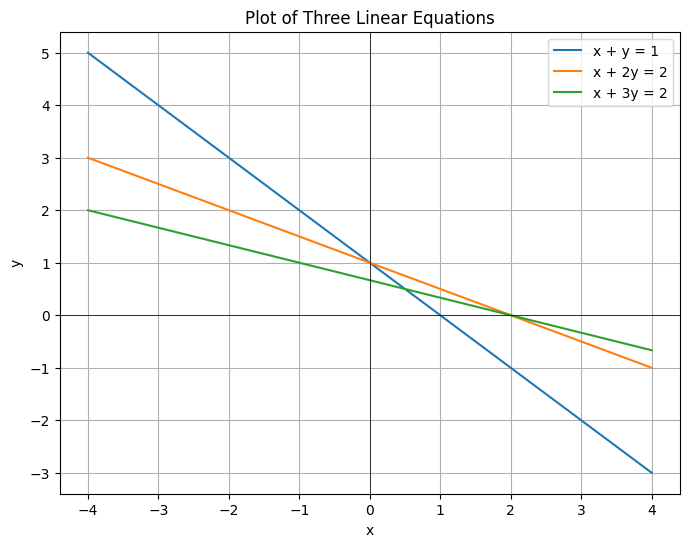

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define x range
x = np.linspace(-4, 4, 50)

# Define the equations
y1 = 1 - x       # x + y = 1
y2 = (2 - x) / 2 # x + 2y = 2
y3 = (2 - x) / 3 # x + 3y = 2

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='x + y = 1')
plt.plot(x, y2, label='x + 2y = 2')
plt.plot(x, y3, label='x + 3y = 2')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Three Linear Equations')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Show plot
plt.show()

## 6. Summary Table
| Method             | Type         | Pros                     | Cons                      |
|--------------------|--------------|--------------------------|---------------------------|
| `np.linalg.solve`  | Direct       | Fast, accurate           | Only for square systems   |
| Inversion          | Direct       | Conceptually simple      | Numerically unstable      |
| Gauss Elimination  | Manual       | Educational               | Tedious for large systems |
| Gauss-Seidel       | Iterative    | Good for sparse systems  | Needs convergence check   |
| Least Squares      | Overdetermined | Handles extra equations | Approximate solution      |


## Exercise Problem 1: 
Solve this system of equations using least squares method and plot the three line in one plot.
1. \(2x + y = 8\)
2. \(x + 3y = 13\)
3. \(x + y = 7\) *(Overdetermined)*



Least-squares solution (x, y) = [2.4 3.6]
Rank(A) = 2
Singular values = [3.873  1.4142]
Residual sum of squares = 1.1999999999999984


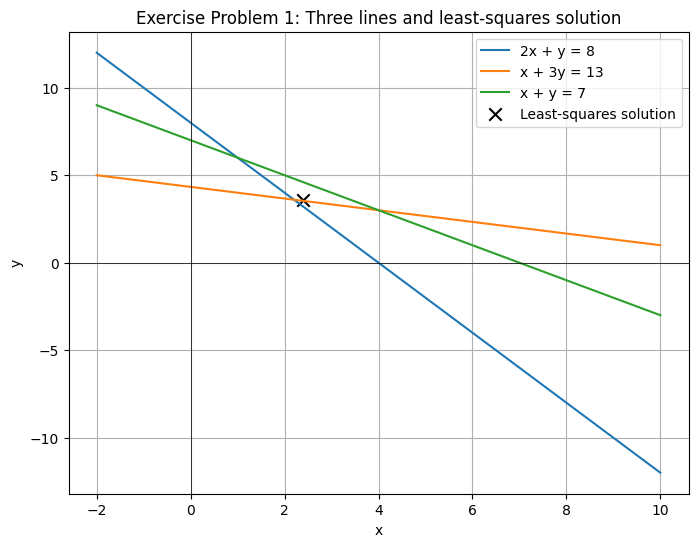

In [18]:

A_ex1 = np.array([[2., 1.],
				  [1., 3.],
				  [1., 1.]])
b_ex1 = np.array([8., 13., 7.])

x_ls, residuals, rank, s = lstsq(A_ex1, b_ex1, rcond=None)
print("Least-squares solution (x, y) =", x_ls)
print("Rank(A) =", rank)
print("Singular values =", s)
if residuals.size > 0:
	print("Residual sum of squares =", residuals[0])
else:
	
	print("Residual sum of squares =", np.linalg.norm(A_ex1 @ x_ls - b_ex1)**2)


xs_plot = np.linspace(-2, 10, 400)
y1 = 8 - 2 * xs_plot           # from 2x + y = 8 -> y = 8 - 2x
y2 = (13 - xs_plot) / 3        # from x + 3y = 13 -> y = (13 - x)/3
y3 = 7 - xs_plot               # from x + y = 7 -> y = 7 - x

plt.figure(figsize=(8, 6))
plt.plot(xs_plot, y1, label='2x + y = 8')
plt.plot(xs_plot, y2, label='x + 3y = 13')
plt.plot(xs_plot, y3, label='x + y = 7')

plt.scatter([x_ls[0]], [x_ls[1]], color='k', marker='x', s=80, label='Least-squares solution')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Exercise Problem 1: Three lines and least-squares solution')
plt.grid(True)
plt.legend()
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.show()

## Exercise Problem 2
Create a $3\times 3$ system with a unique solution. Verify using rank and determinant, then solve with `solve`.

In [20]:
A = np.array([[3., 1., 2.],
			  [1., 2., 0.],
			  [4., 0., 6.]])
b = np.array([9., 5., 20.])

print("A =\n", A)
print("b =", b)

rA = matrix_rank(A)
rAug = matrix_rank(np.c_[A, b])
d = det(A)

print("rank(A) =", rA)
print("rank([A|b]) =", rAug)
print("det(A) =", d)

if abs(d) > 1e-12 and rA == rAug == A.shape[1]:
	x = solve(A, b)
	print("Unique solution x =", x)
else:
	print("System is not guaranteed to have a unique solution. Choose a different A or b.")

A =
 [[3. 1. 2.]
 [1. 2. 0.]
 [4. 0. 6.]]
b = [ 9.  5. 20.]
rank(A) = 3
rank([A|b]) = 3
det(A) = 13.999999999999996
Unique solution x = [-0.1429  2.5714  3.4286]


## Exercise Problem 3
Create an inconsistent system. Compute the least-squares solution and residual norm.

Least-squares solution (x, y) = [1.25 1.25]
rank(A) = 1
singular values = [2. 0.]
Residual norm ||Ax - b|| = 0.7071067811865476


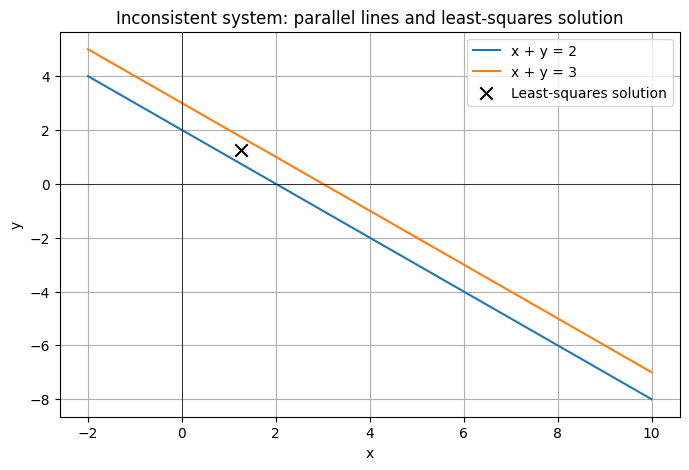

In [22]:
A_inc = np.array([[1., 1.],
				  [1., 1.]])
b_inc = np.array([2., 3.])   

x_ls, residuals, rank_A, s = lstsq(A_inc, b_inc, rcond=None)
print("Least-squares solution (x, y) =", x_ls)
print("rank(A) =", rank_A)
print("singular values =", s)

res_norm = np.linalg.norm(A_inc @ x_ls - b_inc)
print("Residual norm ||Ax - b|| =", res_norm)
if residuals.size > 0:
	print("Residual sum of squares (from lstsq) =", residuals[0])

xs = xs_plot if 'xs_plot' in globals() else np.linspace(-2, 6, 400)
y_line1 = 2 - xs
y_line2 = 3 - xs

plt.figure(figsize=(8,5))
plt.plot(xs, y_line1, label='x + y = 2')
plt.plot(xs, y_line2, label='x + y = 3')
plt.scatter([x_ls[0]], [x_ls[1]], color='k', marker='x', s=80, label='Least-squares solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Inconsistent system: parallel lines and least-squares solution')
plt.grid(True)
plt.legend()
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.show()

## Exercise Problem 4
Use `gaussian_elimination_solve` to solve a new square system and verify the result with `solve`.

In [24]:
# Gaussian elimination step-by-step with printed augmented matrix at each step.
# This cell performs row operations on the augmented matrix [A | b] and
# shows the matrix after each major step, then does back-substitution.

import numpy as np

# (Re)define A and b for clarity in this cell (matches notebook variables)
A = np.array([[2., 4., -3.],
              [3., 6.,  7.],
              [5., 4.,  2.]])
b = np.array([4., 1., -2.])

# Build augmented matrix
aug = np.hstack([A.astype(float), b.reshape(-1, 1).astype(float)])

print("Step 1: Initial augmented matrix [A | b]:")
print(aug)
print()

# Helper to swap rows if pivot is (near) zero
def ensure_nonzero_pivot(mat, pivot_row, pivot_col):
    n = mat.shape[0]
    if abs(mat[pivot_row, pivot_col]) < 1e-12:
        for r in range(pivot_row + 1, n):
            if abs(mat[r, pivot_col]) > 1e-12:
                mat[[pivot_row, r]] = mat[[r, pivot_row]]
                print(f"Swapped row {pivot_row} with row {r} to avoid zero pivot")
                print(mat)
                print()
                return
        # If we get here pivot is zero and cannot be fixed; leave as is.

# Step 2: Make pivot at (0,0) = 1 (scale row 0)
ensure_nonzero_pivot(aug, 0, 0)
pivot = aug[0, 0]
if abs(pivot) < 1e-12:
    raise ZeroDivisionError("Zero pivot encountered at (0,0).")
aug[0] = aug[0] / pivot
print("Step 2: Make pivot A[0,0] = 1 (scale row 0):")
print(aug)
print()

# Step 3: Eliminate A[1,0] using row 0
factor = aug[1, 0]
aug[1] = aug[1] - factor * aug[0]
print("Step 3: Eliminate A[1,0] using row 0:")
print(aug)
print()

# Step 4: Eliminate A[2,0] using row 0
factor = aug[2, 0]
aug[2] = aug[2] - factor * aug[0]
print("Step 4: Eliminate A[2,0] using row 0:")
print(aug)
print()

# Step 5: Make pivot A[1,1] = 1 (scale row 1), swap if needed
ensure_nonzero_pivot(aug, 1, 1)
pivot = aug[1, 1]
if abs(pivot) < 1e-12:
    raise ZeroDivisionError("Zero pivot encountered at (1,1).")
aug[1] = aug[1] / pivot
print("Step 5: Make pivot A[1,1] = 1 (scale row 1):")
print(aug)
print()

# Step 6: Eliminate A[2,1] using row 1
factor = aug[2, 1]
aug[2] = aug[2] - factor * aug[1]
print("Step 6: Eliminate A[2,1] using row 1:")
print(aug)
print()

# Step 7: Make pivot A[2,2] = 1 (scale row 2)
ensure_nonzero_pivot(aug, 2, 2)
pivot = aug[2, 2]
if abs(pivot) < 1e-12:
    raise ZeroDivisionError("Zero pivot encountered at (2,2).")
aug[2] = aug[2] / pivot
print("Step 7: Make pivot A[2,2] = 1 (scale row 2):")
print(aug)
print()

# Step 8: Back substitution to get final solution
U = aug[:, :-1]
y = aug[:, -1]

n = U.shape[0]
x = np.zeros(n)
for i in range(n - 1, -1, -1):
    s = U[i, i+1:] @ x[i+1:]
    x[i] = (y[i] - s) / U[i, i]

print("Step 8: Back substitution result (solution vector x):")
print(x)
print()

try:
    x_np = np.linalg.solve(A, b)
    print("Verification with np.linalg.solve:")
    print(x_np)
except Exception as e:
    print("np.linalg.solve could not compute solution:", e)

Step 1: Initial augmented matrix [A | b]:
[[ 2.  4. -3.  4.]
 [ 3.  6.  7.  1.]
 [ 5.  4.  2. -2.]]

Step 2: Make pivot A[0,0] = 1 (scale row 0):
[[ 1.   2.  -1.5  2. ]
 [ 3.   6.   7.   1. ]
 [ 5.   4.   2.  -2. ]]

Step 3: Eliminate A[1,0] using row 0:
[[ 1.   2.  -1.5  2. ]
 [ 0.   0.  11.5 -5. ]
 [ 5.   4.   2.  -2. ]]

Step 4: Eliminate A[2,0] using row 0:
[[  1.    2.   -1.5   2. ]
 [  0.    0.   11.5  -5. ]
 [  0.   -6.    9.5 -12. ]]

Swapped row 1 with row 2 to avoid zero pivot
[[  1.    2.   -1.5   2. ]
 [  0.   -6.    9.5 -12. ]
 [  0.    0.   11.5  -5. ]]

Step 5: Make pivot A[1,1] = 1 (scale row 1):
[[ 1.      2.     -1.5     2.    ]
 [-0.      1.     -1.5833  2.    ]
 [ 0.      0.     11.5    -5.    ]]

Step 6: Eliminate A[2,1] using row 1:
[[ 1.      2.     -1.5     2.    ]
 [-0.      1.     -1.5833  2.    ]
 [ 0.      0.     11.5    -5.    ]]

Step 7: Make pivot A[2,2] = 1 (scale row 2):
[[ 1.      2.     -1.5     2.    ]
 [-0.      1.     -1.5833  2.    ]
 [ 0.      0.